In [1]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import join
from sklearn.metrics import ConfusionMatrixDisplay

import Euclid

%load_ext autoreload
%autoreload 2

%erun PHZ_ToolBox 0.1

from PhzPlots.PhzPlotEuclidRequirements import plotEuclidRequirements
from PhzCLI.PlotSpecZComparison import compute_stats, SpeczPhotozPlot, displayHistogram
from validation import *

In [2]:
tile_id = 100126585
base_dir = f'/home/aalvarez/Work/Data/PV/Prod/Results/{tile_id}_UNIONS'

In [3]:
phz_cat, mer_cat, gal_sed, star_sed, mer_gal, mer_star = load_catalogs(base_dir, tile_id)

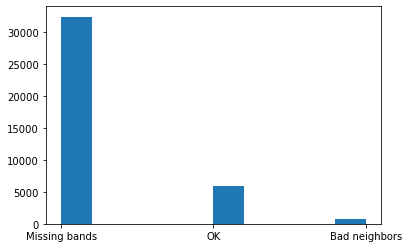

In [4]:
plt.hist(phz_cat['PHZ_FLAGS'].astype(np.int32))
plt.xticks([-1, 0, 1], labels=['Missing bands', 'OK', 'Bad neighbors'])
plt.show()

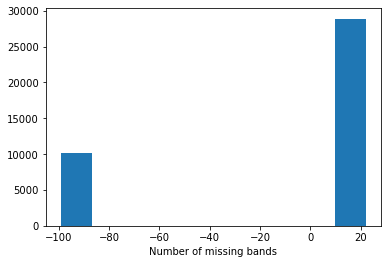

In [24]:
test = np.copy(phz_cat['PHOTOMETRIC_SYSTEM'])
plt.hist(test)
plt.xlabel('Number of missing bands')
plt.show()

In [5]:
phz_cat_notflagged = phz_cat[phz_cat['PHZ_FLAGS'] == 0].copy()
z_cross = join(phz_cat_notflagged, mer_gal, 'OBJECT_ID')

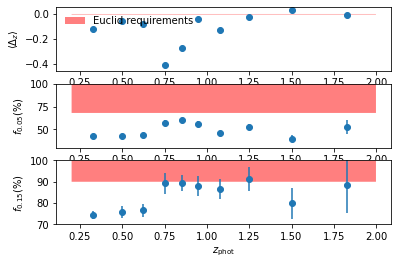

In [6]:
_ = plotEuclidRequirements(z_cross['Z_OBS'], z_cross['PHZ_MODE_1'], z_cross['PHZ_PDF'])

In [7]:
data, mean, median, sigma, mad, nmad, outliersPercent, sigmaNoOutliers, meanNoOutliers = compute_stats(z_cross['Z_OBS'], z_cross['PHZ_MODE_1'])

--> Mean                :  -0.019176713522856423
--> Median              :  -0.016719922423362732
--> Sigma               :  0.21790172604654778
--> Mad                 :  0.049448199570178986
--> NMad                :  0.07331190068274736
--> Outliers            :  17.152228439127917 %
--> Sigma (no outliers) :  0.038491886


/opt/miniconda3/envs/phz/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


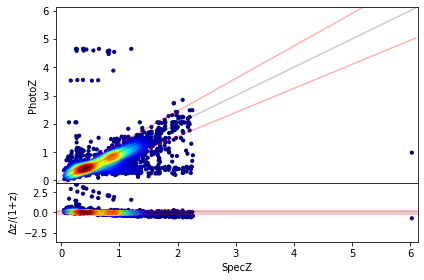

In [8]:
SpeczPhotozPlot(z_cross['OBJECT_ID'], z_cross['Z_OBS'], z_cross['PHZ_MODE_1'], data)

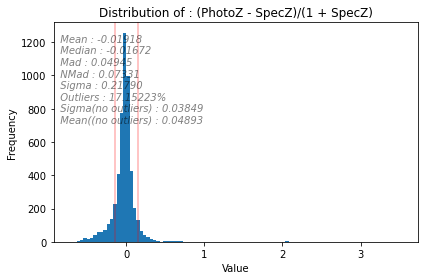

In [9]:
_ = displayHistogram(data, mean, median, mad, nmad, sigma, outliersPercent, sigmaNoOutliers, meanNoOutliers)

In [10]:
cat_cross = join(phz_cat_notflagged, mer_cat, 'OBJECT_ID')

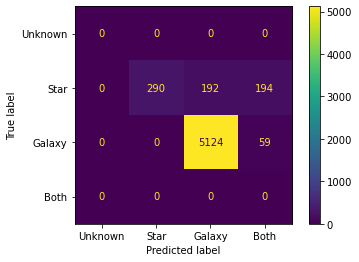

In [12]:
ConfusionMatrixDisplay.from_predictions(cat_cross['TRUE_CLASS'], cat_cross['PHZ_CLASSIFICATION'], labels=[0,1,2,3], display_labels=['Unknown', 'Star', 'Galaxy','Both'])